In [10]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [12]:
scores = np.random.randint(50, 101, (5, 3))
names = ('关羽',  '张飞', '赵云', '马超', '黄忠')
courses = ('语文', '数学', '英语')
df = DataFrame(data=scores, index=names, columns=courses)
df

,语文,数学,英语
关羽,93,66,67
张飞,71,65,88
赵云,95,77,93
马超,96,100,75
黄忠,57,93,91


我们可以通过DataFrame对象的方法mean、max、min、std、var等方法分别获取每个学生或每门课程的平均分、最高分、最低分、标准差、方差等信息，也可以直接通过describe方法直接获取描述性统计信息，代码如下所示。

In [15]:
df.mean()#计算单科平均分

语文    82.4
数学    80.2
英语    82.8
dtype: float64

In [16]:
df.mean(axis = 1)#求每人的平均分

关羽    75.333333
张飞    74.666667
赵云    88.333333
马超    90.333333
黄忠    80.333333
dtype: float64

In [18]:
df.var()#方差

语文    307.8
数学    249.7
英语    127.2
dtype: float64

In [19]:
df.describe()#这是 求全部 的了

,语文,数学,英语
count,5.00000,5.000000,5.000000
mean,82.40000,80.200000,82.800000
std,17.54423,15.801899,11.278298
min,57.00000,65.000000,67.000000
25%,71.00000,66.000000,75.000000
50%,93.00000,77.000000,88.000000
75%,95.00000,93.000000,91.000000
max,96.00000,100.000000,93.000000


如果需要对数据进行排序，可以使用DataFrame对象的sort_values方法，该方法的by参数可以指定根据哪个列或哪些列进行排序，而ascending参数可以指定升序或是降序。例如，下面的代码展示了如何将学生表按语文成绩排降序。

In [21]:
df.sort_values(by='语文', ascending=False)

,语文,数学,英语
马超,96,100,75
赵云,95,77,93
关羽,93,66,67
张飞,71,65,88
黄忠,57,93,91


如果DataFrame数据量很大，排序将是一个非常耗费时间的操作。有的时候我们只需要获得排前N名或后N名的数据，这个时候其实没有必要对整个数据进行排序，而是直接利用堆结构找出Top-N的数据。DataFrame的nlargest和nsmallest方法就提供对Top-N操作的支持，代码如下所示。

In [24]:
# 找出语文成绩前3名的学生信息。
df.nlargest(3, '语文')

,语文,数学,英语
马超,96,100,75
赵云,95,77,93
关羽,93,66,67


In [25]:
# 找出数学成绩最低的3名学生的信息。
df.nsmallest(3, '数学')

,语文,数学,英语
张飞,71,65,88
关羽,93,66,67
赵云,95,77,93


#### 分组聚合操作

In [27]:
df = pd.read_excel('res/2020年销售数据.xlsx')
df.head()

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量,销售额
0,2020-01-01,上海,拼多多,182894-455,八匹马,99,83,8217
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29,6351
2,2020-01-01,上海,天猫,205654-021,八匹马,169,85,14365
3,2020-01-01,上海,天猫,205654-519,八匹马,169,14,2366
4,2020-01-01,上海,天猫,377781-010,皮皮虾,249,61,15189


如果我们要统计每个销售区域的销售总额，可以先通过“售价”和“销售数量”计算出销售额，为DataFrame添加一个列，代码如下所示

In [31]:
df['销售额']

0        8217
1        6351
2       14365
3        2366
4       15189
        ...  
1940     6994
1941     7663
1942    14795
1943     3481
1944     2673
Name: 销售额, Length: 1945, dtype: int64

In [34]:
df.drop('销售额', axis=1)

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量
0,2020-01-01,上海,拼多多,182894-455,八匹马,99,83
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29
2,2020-01-01,上海,天猫,205654-021,八匹马,169,85
3,2020-01-01,上海,天猫,205654-519,八匹马,169,14
4,2020-01-01,上海,天猫,377781-010,皮皮虾,249,61
...,...,...,...,...,...,...,...
1940,2020-12-30,北京,京东,D89677,花花姑娘,269,26
1941,2020-12-30,福建,实体,182719-050,八匹马,79,97
1942,2020-12-31,福建,实体,G70083,花花姑娘,269,55
1943,2020-12-31,福建,抖音,211471-902/704,八匹马,59,59


可以先通过“售价”和“销售数量”计算出销售额，为DataFrame添加一个列，代码如下所示。

In [36]:
df['销售额'] = df['售价'] * df['销售数量']
df.head()

,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量,销售额
0,2020-01-01,上海,拼多多,182894-455,八匹马,99,83,8217
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29,6351
2,2020-01-01,上海,天猫,205654-021,八匹马,169,85,14365
3,2020-01-01,上海,天猫,205654-519,八匹马,169,14,2366
4,2020-01-01,上海,天猫,377781-010,皮皮虾,249,61,15189


然后再根据“销售区域”列对数据进行分组，这里我们使用的是DataFrame对象的groupby方法。分组之后，我们取“销售额”这个列在分组内进行求和处理，代码和结果如下所示。

In [40]:
df.groupby('销售区域')['销售额'].sum()

销售区域
上海    11610489
北京    12477717
南京     1767301
安徽      895463
广东     1617949
江苏      537079
浙江      687862
福建    10178227
Name: 销售额, dtype: int64

In [39]:
df.groupby('销售区域').销售额.sum()

销售区域
上海    11610489
北京    12477717
南京     1767301
安徽      895463
广东     1617949
江苏      537079
浙江      687862
福建    10178227
Name: 销售额, dtype: int64

如果我们要统计每个月的销售总额，我们可以将“销售日期”作为groupby`方法的参数，当然这里需要先将“销售日期”处理成月，代码和结果如下所示。

In [42]:
df.groupby(df['销售日期'].dt.month)['销售额'].sum()

销售日期
1     5409855
2     4608455
3     4164972
4     3996770
5     3239005
6     2817936
7     3501304
8     2948189
9     2632960
10    2375385
11    2385283
12    1691973
Name: 销售额, dtype: int64

接下来我们将难度升级，统计每个销售区域每个月的销售总额，这又该如何处理呢？事实上，groupby方法的第一个参数可以是一个列表，列表中可以指定多个分组的依据，大家看看下面的代码和输出结果就明白了。

In [44]:
df.groupby(['销售区域', df['销售日期'].dt.month])['销售额'].sum()

销售区域  销售日期
上海    1       1679125
      2       1689527
      3       1061193
      4       1082187
      5        841199
      6        785404
      7        863906
      8        734937
      9       1107693
      10       412108
      11       825169
      12       528041
北京    1       1878234
      2       1807787
      3       1360666
      4       1205989
      5        807300
      6       1216432
      7       1219083
      8        645727
      9        390077
      10       671608
      11       678668
      12       596146
南京    7        841032
      10       710962
      12       215307
安徽    4        341308
      5        554155
广东    3        388180
      8        469390
      9        365191
      11       395188
江苏    4        537079
浙江    3        248354
      8        439508
福建    1       1852496
      2       1111141
      3       1106579
      4        830207
      5       1036351
      6        816100
      7        577283
      8        658627
      9        769999

如果希望统计出每个区域的销售总额以及每个区域单笔金额的最高和最低，我们可以在DataFrame或Series对象上使用agg方法并指定多个聚合函数，代码和结果如下所示。


In [46]:
df.groupby('销售区域').销售额.agg(['sum','max','min'])

,sum,max,min
销售区域,,,
上海,11610489,116303,948
北京,12477717,133411,690
南京,1767301,87527,1089
安徽,895463,68502,1683
广东,1617949,120807,990
江苏,537079,114312,3383
浙江,687862,90909,3927
福建,10178227,87527,897


如果希望自定义聚合后的列的名字，可以使用如下所示的方法。

In [49]:
df.groupby('销售区域').销售额.agg(销售总额='sum',单笔最高='max',单笔最低='min')

,销售总额,单笔最高,单笔最低
销售区域,,,
上海,11610489,116303,948
北京,12477717,133411,690
南京,1767301,87527,1089
安徽,895463,68502,1683
广东,1617949,120807,990
江苏,537079,114312,3383
浙江,687862,90909,3927
福建,10178227,87527,897


如果需要对多个列使用不同的聚合函数，例如“统计每个销售区域销售额的平均值以及销售数量的最低值和最高值”，我们可以按照下面的方式来操作。

In [58]:
df


,销售日期,销售区域,销售渠道,销售订单,品牌,售价,销售数量,销售额
0,2020-01-01,上海,拼多多,182894-455,八匹马,99,83,8217
1,2020-01-01,上海,抖音,205635-402,八匹马,219,29,6351
2,2020-01-01,上海,天猫,205654-021,八匹马,169,85,14365
3,2020-01-01,上海,天猫,205654-519,八匹马,169,14,2366
4,2020-01-01,上海,天猫,377781-010,皮皮虾,249,61,15189
...,...,...,...,...,...,...,...,...
1940,2020-12-30,北京,京东,D89677,花花姑娘,269,26,6994
1941,2020-12-30,福建,实体,182719-050,八匹马,79,97,7663
1942,2020-12-31,福建,实体,G70083,花花姑娘,269,55,14795
1943,2020-12-31,福建,抖音,211471-902/704,八匹马,59,59,3481


In [57]:
df.groupby('销售区域')[['销售额','销售数量']].agg({'销售额':'mean','销售数量': ['max', 'min']
                                       })

销售额 销售数量    
              mean  max min
销售区域                       
上海    20622.538188  100  10
北京    20125.350000  100  10
南京    22370.898734  100  11
安徽    26337.147059   98  16
广东    32358.980000   98  10
江苏    29837.722222   98  15
浙江    27514.480000   95  20
福建    18306.163669  100  10

### 透视表和交叉表

In [61]:
pd.pivot_table(df, index = '销售区域', values = '销售额', aggfunc = 'sum')

,销售额
销售区域,
上海,11610489
北京,12477717
南京,1767301
安徽,895463
广东,1617949
江苏,537079
浙江,687862
福建,10178227


上面的结果操作跟之前用groupby的方式得到的结果有一些区别，groupby操作后，如果对单个列进行聚合，得到的结果是一个Series对象，而上面的结果是一个DataFrame 对象。

上面的操作结果是一个DataFrame，但也是一个长长的“窄表”，如果希望做成一个行比较少列比较多的“宽表”，可以将index参数中的列放到columns参数中，代码如下所示。

In [66]:
pd.pivot_table(df, index='销售区域', values='销售额', columns=df['销售日期'].dt.month, 上面的操作结果是一个DataFrame，但也是一个长长的“窄表”，如果希望做成一个行比较少列比较多的“宽表”，可以将index参数中的列放到columns参数中，代码如下所示。='sum',fill_value=0)

销售日期,1,2,3,4,5,6,7,8,9,10,11,12
销售区域,,,,,,,,,,,,
上海,1679125,1689527,1061193,1082187,841199,785404,863906,734937,1107693,412108,825169,528041
北京,1878234,1807787,1360666,1205989,807300,1216432,1219083,645727,390077,671608,678668,596146
南京,0,0,0,0,0,0,841032,0,0,710962,0,215307
安徽,0,0,0,341308,554155,0,0,0,0,0,0,0
广东,0,0,388180,0,0,0,0,469390,365191,0,395188,0
江苏,0,0,0,537079,0,0,0,0,0,0,0,0
浙江,0,0,248354,0,0,0,0,439508,0,0,0,0
福建,1852496,1111141,1106579,830207,1036351,816100,577283,658627,769999,580707,486258,352479


In [70]:
# 通过添加margins和margins_name参数对分组聚合的结果做一个汇总
df['月份']=df['销售日期'].dt.month
pd.pivot_table(df, index='销售区域', columns='月份', values='销售额', aggfunc='sum',fill_value=0,margins=True,margins_name='总计')

月份,1,2,3,4,5,6,7,8,9,10,11,12,总计
销售区域,,,,,,,,,,,,,
上海,1679125,1689527,1061193,1082187,841199,785404,863906,734937,1107693,412108,825169,528041,11610489
北京,1878234,1807787,1360666,1205989,807300,1216432,1219083,645727,390077,671608,678668,596146,12477717
南京,0,0,0,0,0,0,841032,0,0,710962,0,215307,1767301
安徽,0,0,0,341308,554155,0,0,0,0,0,0,0,895463
广东,0,0,388180,0,0,0,0,469390,365191,0,395188,0,1617949
江苏,0,0,0,537079,0,0,0,0,0,0,0,0,537079
浙江,0,0,248354,0,0,0,0,439508,0,0,0,0,687862
福建,1852496,1111141,1106579,830207,1036351,816100,577283,658627,769999,580707,486258,352479,10178227
总计,5409855,4608455,4164972,3996770,3239005,2817936,3501304,2948189,2632960,2375385,2385283,1691973,39772087


交叉表就是一种特殊的透视表，它不需要先构造一个DataFrame对象，而是直接通过数组或Series对象指定两个或多个因素进行运算得到统计结果。例如，我们要统计每个销售区域的销售总额，也可以按照如下所示的方式来完成，我们先准备三组数据。

In [72]:
sales_area, sales_month, sales_amount = df['销售区域'], df['月份'], df['销售额']

使用crosstab函数生成交叉表。

In [75]:
pd.crosstab(index=sales_area, columns=sales_month,values=sales_amount,aggfunc='sum').fillna(0).applymap(int)

月份,1,2,3,4,5,6,7,8,9,10,11,12
销售区域,,,,,,,,,,,,
上海,1679125,1689527,1061193,1082187,841199,785404,863906,734937,1107693,412108,825169,528041
北京,1878234,1807787,1360666,1205989,807300,1216432,1219083,645727,390077,671608,678668,596146
南京,0,0,0,0,0,0,841032,0,0,710962,0,215307
安徽,0,0,0,341308,554155,0,0,0,0,0,0,0
广东,0,0,388180,0,0,0,0,469390,365191,0,395188,0
江苏,0,0,0,537079,0,0,0,0,0,0,0,0
浙江,0,0,248354,0,0,0,0,439508,0,0,0,0
福建,1852496,1111141,1106579,830207,1036351,816100,577283,658627,769999,580707,486258,352479


上面的代码使用了DataFrame对象的fillna方法将空值处理为0，再使用applymap方法将数据类型处理成整数。

### 数据可视化

一图胜千言，我们对数据进行透视的结果，最终要通过图表的方式呈现出来，因为图表具有极强的表现力，能够让我们迅速的解读数据中隐藏的价值。和Series一样，DataFrame对象提供了plot方法来支持绘图，底层仍然是通过matplotlib库实现图表的渲染。关于matplotlib的内容，我们在下一个章节进行详细的探讨，这里我们只简单的讲解plot方法的用法。

例如，我们想通过一张柱状图来比较“每个销售区域的销售总额”，可以直接在透视表上使用plot方法生成柱状图。我们先导入matplotlib.pyplot模块，通过修改绘图的参数使其支持中文显示。

In [98]:
import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = 'FZJKai-Z03S'
# 配置支持中文的非衬线字体（默认的字体无法显示中文）
plt.rcParams['font.sans-serif'] = ['SimHei', ]
# 使用指定的中文字体时需要下面的配置来避免负号无法显示
plt.rcParams['axes.unicode_minus'] = False

In [94]:
# 使用魔法指令配置生成矢量图。
%config InlineBackend.figure_format = 'svg'

绘制“每个销售区域销售总额”的柱状图。

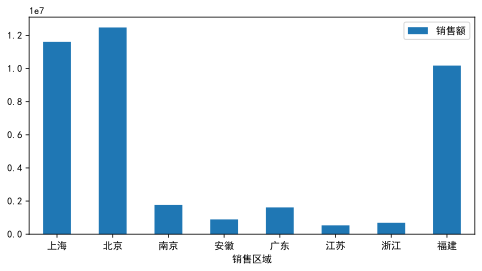

In [99]:
temp = pd.pivot_table(df, index='销售区域', values='销售额', aggfunc='sum')
temp.plot(figsize=(8, 4), kind='bar')
plt.xticks(rotation=0)
plt.show()

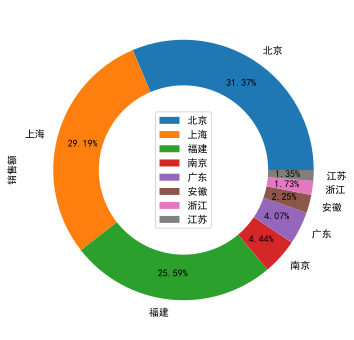

In [100]:
temp.sort_values(by='销售额', ascending=False).plot(figsize=(6, 6),kind='pie', y='销售额', autopct='%.2f%%',pctdistance=0.8,wedgeprops=dict(linewidth=1, width=0.35))
plt.legend(loc='center')
plt.show()